# NYC AIRBNB DATA ANALYSIS PROJECT

## Import Necessary Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## DATA LOADING & EXPLORATION

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\listings.csv")

In [5]:
# Basic Dataset Information
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names:\n{list(df.columns)}")

Total rows: 36111
Total columns: 18

Column names:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


In [6]:
df.info() # to check for null values and the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36111 non-null  int64  
 1   name                            36109 non-null  object 
 2   host_id                         36111 non-null  int64  
 3   host_name                       34945 non-null  object 
 4   neighbourhood_group             36111 non-null  object 
 5   neighbourhood                   36111 non-null  object 
 6   latitude                        36111 non-null  float64
 7   longitude                       36111 non-null  float64
 8   room_type                       36111 non-null  object 
 9   price                           21328 non-null  float64
 10  minimum_nights                  36111 non-null  int64  
 11  number_of_reviews               36111 non-null  int64  
 12  last_review                     

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Studio Oasis | Midtown Manhattan Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.24,3,289,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,96.0,30,195,2025-06-09,0.98,1,285,3,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,59.0,30,1,2022-06-05,0.02,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,73.0,30,249,2025-05-27,1.28,1,186,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.07,2,0,0,NaN


In [8]:
# Summary statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.611100e+04,3.611100e+04,36111.000000,36111.000000,21328.000000,36111.000000,36111.000000,24923.000000,36111.000000,36111.000000,36111.000000
mean,4.667906e+17,1.756195e+08,40.728253,-73.947350,680.526819,28.610091,27.321232,0.821178,67.455152,162.188724,3.983606
std,5.448721e+17,1.945624e+08,0.056269,0.054995,4480.453282,29.166476,70.308684,1.916104,215.678813,147.262625,19.468284
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.159416e+07,1.795864e+07,40.688260,-73.983560,89.000000,30.000000,0.000000,0.070000,1.000000,0.000000,0.000000
50%,5.095308e+07,8.832602e+07,40.725960,-73.955000,154.000000,30.000000,3.000000,0.250000,2.000000,150.000000,0.000000
75%,9.747695e+17,3.107737e+08,40.762120,-73.928118,279.000000,30.000000,23.000000,0.900000,9.000000,315.000000,1.000000
max,1.521848e+18,7.214431e+08,40.912017,-73.711822,50104.000000,1124.000000,3736.000000,122.760000,1148.000000,365.000000,1699.000000


In [9]:
# To check for Missing Values

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

                   Missing Count  Percentage
license                    30735   85.112570
price                      14783   40.937664
last_review                11188   30.982249
reviews_per_month          11188   30.982249
host_name                   1166    3.228933
name                           2    0.005538


In [10]:
# To check Duplicate Rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [11]:
# Unique Values in Key Columns

print(f"Unique neighbourhoods: {df['neighbourhood'].nunique()}")
print(f"Unique neighbourhood groups: {df['neighbourhood_group'].nunique()}")
print(f"Unique room types: {df['room_type'].nunique()}")
print(f"Unique hosts: {df['host_id'].nunique()}")

Unique neighbourhoods: 224
Unique neighbourhood groups: 5
Unique room types: 4
Unique hosts: 21382


## DATA CLEANING

In [12]:

# Create a copy for cleaning
df_clean = df.copy()

In [13]:
# Convert last_review to datetime
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'], errors='coerce')
print(f"Data type: {df_clean['last_review'].dtype}")

Data type: datetime64[ns]


In [14]:
df_clean.reviews_per_month

0        0.24
1        0.98
2        0.02
3        1.28
4        0.07
         ... 
36106     NaN
36107     NaN
36108     NaN
36109     NaN
36110     NaN
Name: reviews_per_month, Length: 36111, dtype: float64

In [15]:
#Handle Missing Values

# Fill missing reviews_per_month with 0 (means no reviews)
if 'reviews_per_month' in df_clean.columns:
    before_fill = df_clean['reviews_per_month'].isnull().sum()
    df_clean['reviews_per_month'].fillna(0, inplace=True)
    print(f"reviews_per_month: Filled {before_fill} missing values with 0")

# Fill missing host_name with 'Unknown'
if 'host_name' in df_clean.columns:
    before_fill = df_clean['host_name'].isnull().sum()
    df_clean['host_name'].fillna('Unknown', inplace=True)
    print(f"host_name: Filled {before_fill} missing values with 'Unknown'")



reviews_per_month: Filled 11188 missing values with 0
host_name: Filled 1166 missing values with 'Unknown'


In [16]:
# Remove irrelevant columns

# Remove listings with zero or null price
df_clean = df_clean[df_clean['price'] > 0]
print(f"Rows after removing zero/null price: {len(df_clean)}")

# Remove listings with zero availability
if 'availability_365' in df_clean.columns:
    df_clean = df_clean[df_clean['availability_365'] > 0]
    print(f"Rows after removing zero availability: {len(df_clean)}")

print(f"\nTotal rows removed: {len(df) - len(df_clean)}")




Rows after removing zero/null price: 21328
Rows after removing zero availability: 21157

Total rows removed: 14954


In [17]:
df_clean.shape
print(f"\nRemaining missing values:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


Remaining missing values:
last_review     6343
license        16967
dtype: int64


## DATA ENRICHMENT

In [18]:
# Create price_per_booking column
df_clean['price_per_booking'] = df_clean['price'] * df_clean['minimum_nights']
print(f"Sample price_per_booking values:")
print(df_clean[['price', 'minimum_nights', 'price_per_booking']].head(10))


Sample price_per_booking values:
    price  minimum_nights  price_per_booking
0   240.0              30             7200.0
1    96.0              30             2880.0
2    59.0              30             1770.0
3    73.0              30             2190.0
7   170.0              30             5100.0
8   175.0              30             5250.0
9    90.0              30             2700.0
12  232.0               2              464.0
13  151.0              30             4530.0
14  115.0              30             3450.0


In [19]:
# Create availability categories
def categorize_availability(days):
    if days > 300:
        return 'Full-time'
    elif days >= 100:
        return 'Part-time'
    else:
        return 'Rare'

df_clean['availability_category'] = df_clean['availability_365'].apply(categorize_availability)

print("Availability category distribution:")
print(df_clean['availability_category'].value_counts())
print("\nSample of categorized data:")
print(df_clean[['availability_365', 'availability_category']].head(10))

Availability category distribution:
availability_category
Full-time    9243
Part-time    8973
Rare         2941
Name: count, dtype: int64

Sample of categorized data:
    availability_365 availability_category
0                289             Part-time
1                285             Part-time
2                 83                  Rare
3                186             Part-time
7                275             Part-time
8                 71                  Rare
9                244             Part-time
12               203             Part-time
13               286             Part-time
14               300             Part-time


## EXPLORATORY DATA ANALYSIS

In [22]:
# Analysis 1: Top 10 most expensive neighborhoods by average price
print("Top 10 Most Expensive Neighborhoods by Average Price:")
top_neighborhoods = df_clean.groupby('neighbourhood').agg({
    'price': ['mean', 'count']
}).round(2)
top_neighborhoods.columns = ['Average Price', 'Number of Listings']
top_neighborhoods = top_neighborhoods.sort_values('Average Price', ascending=False).head(10)
print(top_neighborhoods)

Top 10 Most Expensive Neighborhoods by Average Price:
                  Average Price  Number of Listings
neighbourhood                                      
SoHo                    3418.54                 134
Long Island City        2751.11                 254
Murray Hill             2359.19                 324
Lower East Side         2213.08                 323
Midtown                 2168.86                1284
Upper West Side         1894.17                 827
Nolita                  1796.10                  96
Chinatown               1684.53                 149
Hell's Kitchen          1577.62                 966
Upper East Side         1145.28                 924


In [23]:
# Analysis 2: Average availability and price by room type
print("Average Availability and Price by Room Type:")
room_type_stats = df_clean.groupby('room_type').agg({
    'price': 'mean',
    'availability_365': 'mean',
    'id': 'count'
}).round(2)
room_type_stats.columns = ['Average Price', 'Average Availability (days)', 'Number of Listings']
print(room_type_stats)

Average Availability and Price by Room Type:
                 Average Price  Average Availability (days)  \
room_type                                                     
Entire home/apt         307.16                       254.49   
Hotel room            36431.21                       293.67   
Private room            231.42                       249.53   
Shared room             141.04                       282.03   

                 Number of Listings  
room_type                            
Entire home/apt               11886  
Hotel room                      229  
Private room                   8863  
Shared room                     179  


In [24]:
# Analysis 3: Host with the most listings
print("Host with the Most Listings:")
host_listings = df_clean.groupby(['host_id', 'host_name']).size().reset_index(name='listing_count')
top_host = host_listings.sort_values('listing_count', ascending=False).head(1)
print(f"Host ID: {top_host['host_id'].values[0]}")
print(f"Host Name: {top_host['host_name'].values[0]}")
print(f"Number of Listings: {top_host['listing_count'].values[0]}")

print("\nTop 10 Hosts by Listing Count:")
print(host_listings.sort_values('listing_count', ascending=False).head(10))

Host with the Most Listings:
Host ID: 107434423
Host Name: Unknown
Number of Listings: 1019

Top 10 Hosts by Listing Count:
        host_id           host_name  listing_count
5198  107434423             Unknown           1019
1053    3223938              Eugene            384
8401  446820235   LuxurybookingsFZE            293
4115   51501835            Jeniffer            228
9501  533234561                Tina            220
5907  162280872     Urban Furnished            215
3528   35491667                 Nat            173
2932   22541573  Furnished Quarters            157
5598  137358866                 Kaz            134
4365   61391963              Darren            124


In [31]:
# Analysis 4: Average price variation across boroughs/districts
print("Average Price Across Boroughs/Districts:")
borough_stats = df_clean.groupby('neighbourhood_group').agg({
    'price': ['mean', 'median', 'min', 'max', 'count']
}).round(2)
borough_stats.columns = ['Average Price', 'Median Price', 'Min Price', 'Max Price', 'Number of Listings']
borough_stats = borough_stats.sort_values('Average Price', ascending=False)
print(borough_stats)



Average Price Across Boroughs/Districts:
                     Average Price  Median Price  Min Price  Max Price  \
neighbourhood_group                                                      
Manhattan                  1182.95         230.0       10.0    50104.0   
Queens                      334.95         104.0       13.0    50000.0   
Brooklyn                    247.78         130.0       25.0    50000.0   
Bronx                       130.63          95.0       29.0     9895.0   
Staten Island               125.56          99.0       26.0     1400.0   

                     Number of Listings  
neighbourhood_group                      
Manhattan                          9276  
Queens                             3300  
Brooklyn                           7445  
Bronx                               825  
Staten Island                       311  


In [32]:
# Analysis 5: Listings that have never been reviewed
print("Listings That Have Never Been Reviewed:")
never_reviewed = df_clean[df_clean['number_of_reviews'] == 0]
print(f"Total listings never reviewed: {len(never_reviewed)}")
print(f"Percentage of total listings: {(len(never_reviewed)/len(df_clean)*100):.2f}%")

# Breakdown by room type
print("\nNever reviewed by room type:")
never_reviewed_by_type = never_reviewed.groupby('room_type').size()
print(never_reviewed_by_type)

# Breakdown by borough
print("\nNever reviewed by borough:")
never_reviewed_by_borough = never_reviewed.groupby('neighbourhood_group').size()
print(never_reviewed_by_borough)

Listings That Have Never Been Reviewed:
Total listings never reviewed: 6343
Percentage of total listings: 29.98%

Never reviewed by room type:
room_type
Entire home/apt    3562
Hotel room          161
Private room       2537
Shared room          83
dtype: int64

Never reviewed by borough:
neighbourhood_group
Bronx             201
Brooklyn         2001
Manhattan        3373
Queens            702
Staten Island      66
dtype: int64


In [ ]:
# Analysis 6: Price distribution statistics
print("\nOverall Price Distribution:")
print(f"Mean price: ${df_clean['price'].mean():.2f}")
print(f"Median price: ${df_clean['price'].median():.2f}")
print(f"Standard deviation: ${df_clean['price'].std():.2f}")
print(f"Minimum price: ${df_clean['price'].min():.2f}")
print(f"Maximum price: ${df_clean['price'].max():.2f}")
print(f"\nPrice quartiles:")
print(df_clean['price'].describe())


Overall Price Distribution:
Mean price: $665.03
Median price: $153.00
Standard deviation: $4404.10
Minimum price: $10.00
Maximum price: $50104.00

Price quartiles:
count    21157.000000
mean       665.027272
std       4404.097374
min         10.000000
25%         89.000000
50%        153.000000
75%        277.000000
max      50104.000000
Name: price, dtype: float64


In [34]:
# Analysis 7: Availability category analysis
print("\n5.2 Availability Category Analysis:")
avail_cat_stats = df_clean.groupby('availability_category').agg({
    'price': 'mean',
    'id': 'count'
}).round(2)
avail_cat_stats.columns = ['Average Price', 'Number of Listings']
print(avail_cat_stats)



5.2 Availability Category Analysis:
                       Average Price  Number of Listings
availability_category                                   
Full-time                     810.96                9243
Part-time                     637.08                8973
Rare                          291.64                2941


In [37]:
# Analysis 8: Reviews analysis
print("\nReviews Analysis:")
print(f"Average reviews per listing: {df_clean['number_of_reviews'].mean():.2f}")
print(f"Median reviews per listing: {df_clean['number_of_reviews'].median():.2f}")
print(f"Listings with 0 reviews: {(df_clean['number_of_reviews'] == 0).sum()}")
print(f"Listings with 100+ reviews: {(df_clean['number_of_reviews'] >= 100).sum()}")


Reviews Analysis:
Average reviews per listing: 36.64
Median reviews per listing: 5.00
Listings with 0 reviews: 6343
Listings with 100+ reviews: 2307


In [38]:
# Analysis 9: Minimum nights analysis
print("\nMinimum Nights Requirement Analysis:")
print(f"Average minimum nights: {df_clean['minimum_nights'].mean():.2f}")
print(f"Median minimum nights: {df_clean['minimum_nights'].median():.2f}")
print(f"Listings with 1 night minimum: {(df_clean['minimum_nights'] == 1).sum()}")
print(f"Listings with 30+ nights minimum: {(df_clean['minimum_nights'] >= 30).sum()}")


Minimum Nights Requirement Analysis:
Average minimum nights: 26.57
Median minimum nights: 30.00
Listings with 1 night minimum: 2044
Listings with 30+ nights minimum: 17066


## VISUALIZATION

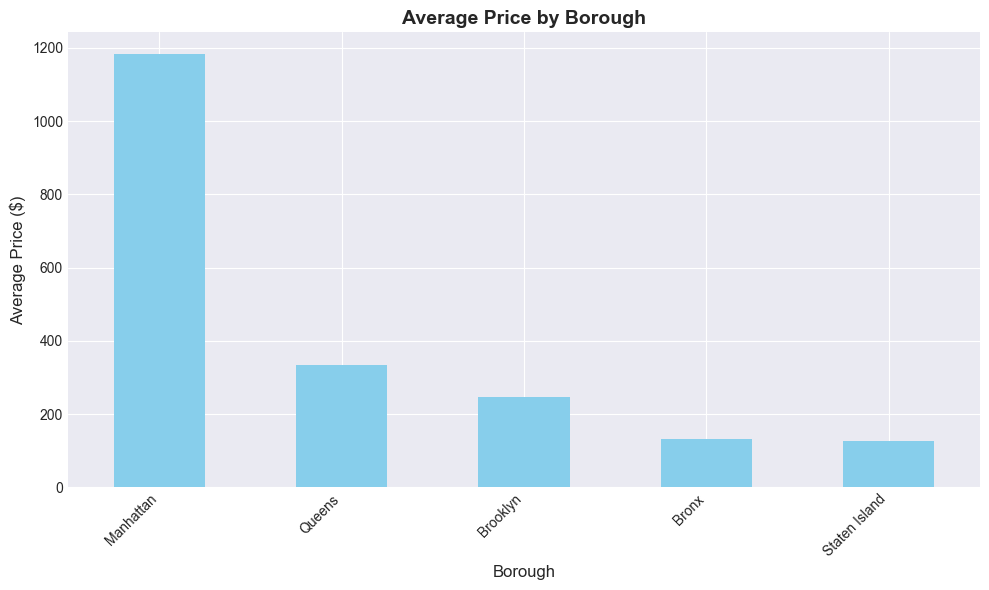

In [ ]:
# 1. Price distribution by borough
plt.figure(figsize=(10, 6))
borough_stats['Average Price'].plot(kind='bar', color='skyblue')
plt.title('Average Price by Borough', fontsize=14, fontweight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

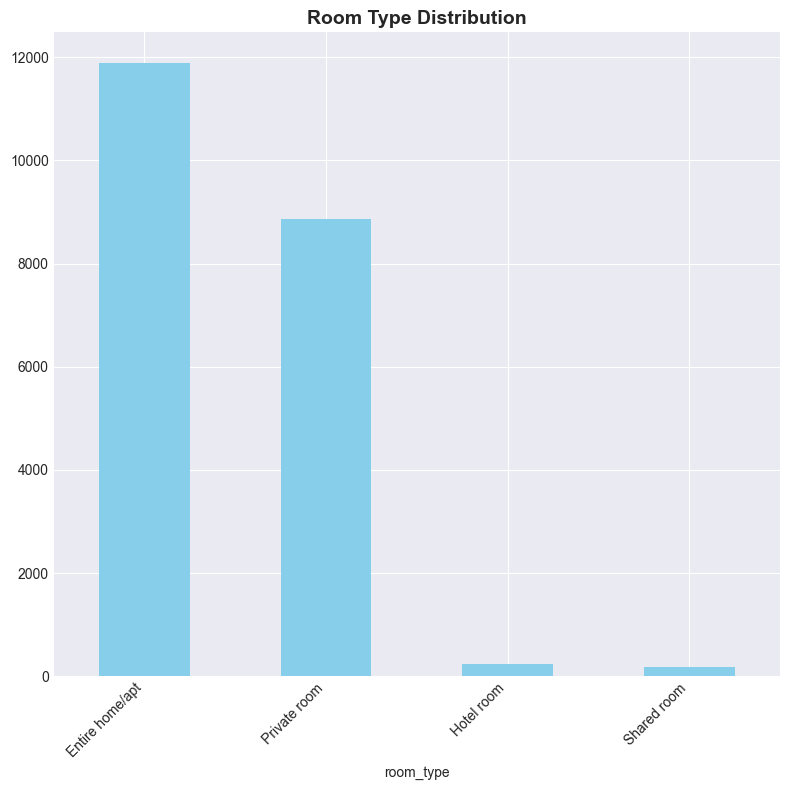

In [48]:
# 2. Room type distribution
plt.figure(figsize=(8, 8))
df_clean['room_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Room Type Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

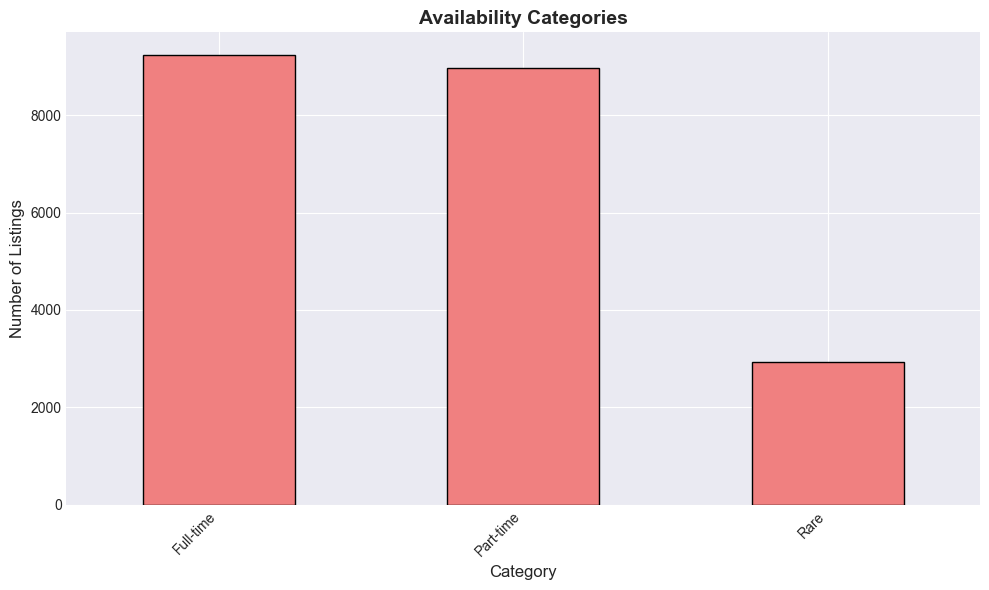

In [50]:
# 3. Availability categories
plt.figure(figsize=(10, 6))
df_clean['availability_category'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Availability Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

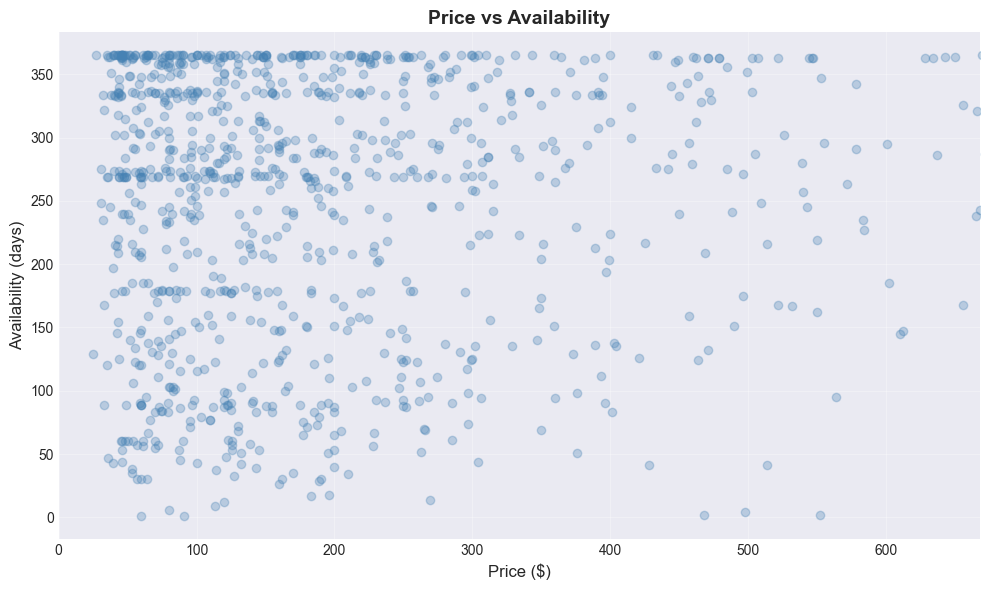

In [53]:
# 4. Price vs Availability scatter plot
plt.figure(figsize=(10, 6))
sample = df_clean.sample(min(1000, len(df_clean)))
plt.scatter(sample['price'], sample['availability_365'], alpha=0.3, color='steelblue')
plt.title('Price vs Availability', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Availability (days)', fontsize=12)
plt.xlim(0, df_clean['price'].quantile(0.95))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



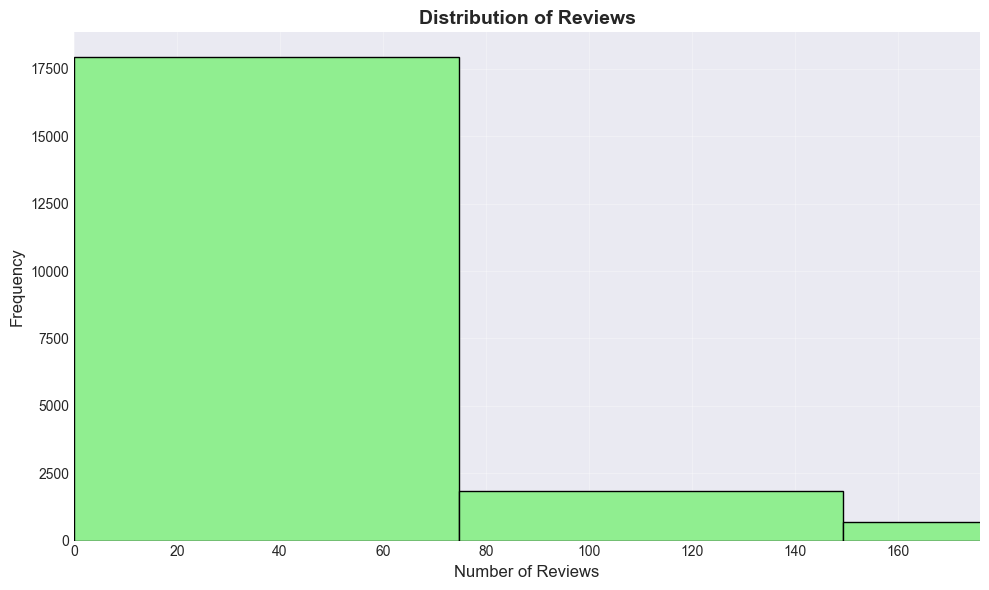

In [51]:
# 5. Reviews distribution
plt.figure(figsize=(10, 6))
df_clean['number_of_reviews'].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, df_clean['number_of_reviews'].quantile(0.95))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


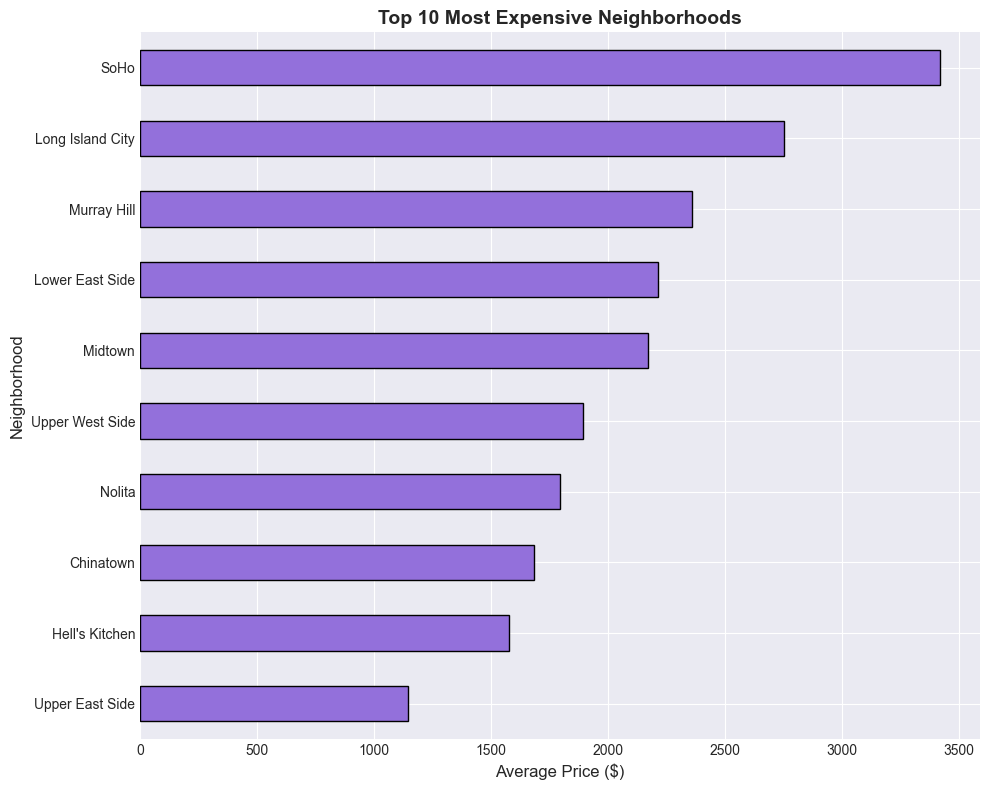

In [54]:
# 6. Top 10 Most Expensive Neighborhoods
plt.figure(figsize=(10, 8))

top_neighborhoods_sorted = top_neighborhoods.sort_values(by='Average Price', ascending=False).head(10)
top_neighborhoods_sorted.sort_values(by='Average Price', ascending=True)['Average Price'].plot(
    kind='barh',
    color='mediumpurple',
    edgecolor='black'
)

plt.title('Top 10 Most Expensive Neighborhoods', fontsize=14, fontweight='bold')
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.tight_layout()
plt.show()


## Executive Summary
This analysis examines 21,157 Airbnb listings in New York City, revealing significant patterns in pricing, availability, and market dynamics.

---

## 🏙️ Insight 1: Price Disparity Across Boroughs

**Finding:** Significant price variations exist across NYC boroughs, indicating clear market segmentation.

- **Manhattan** is the most expensive borough with an average price of **$1,182.95**
- **Staten Island** is the least expensive with an average price of **$125.56**
- **Price difference:** $1,057.39 (842.1% more expensive)

**Implication:** This indicates significant wealth concentration and market segmentation in certain areas. Hosts in premium boroughs can command substantially higher prices, while budget-conscious travelers have affordable options in other areas.

---

## 🏠 Insight 2: Room Type Economics

**Finding:** Different room types show distinct pricing strategies and market positioning.

- **Hotel room** is the most expensive room type at **$36,431.21**
- **Entire home/apt** is the most common room type with **11,886 listings**
- Average availability varies significantly by room type, suggesting different hosting strategies

**Implication:** The market caters to diverse traveler needs—from budget-conscious guests seeking shared spaces to luxury travelers wanting entire properties. Hosts should align their offerings with target market expectations.

---

## ⭐ Insight 3: The New Listing Challenge

**Finding:** A substantial portion of listings struggle to gain initial traction.

- **6,343 listings (30.0%)** have never been reviewed
- This represents a significant challenge for new market entrants
- These listings may be very new or face difficulty attracting initial guests

**Implication:** Building initial credibility is crucial. New hosts should focus on:
- Competitive pricing strategies  
- Professional photography and detailed descriptions  
- Responsive communication  
- Strategic discounts for first guests to generate reviews  

---

## 👔 Insight 4: Professional Host Dominance

**Finding:** The market is increasingly dominated by professional property managers.

- The top host manages **1,019 listings**
- Top 10 hosts control **2,947 listings (13.9% of market)**
- This indicates professional property management operations dominating the market

**Implication:** The NYC Airbnb market has matured from individual home-sharing to professional property management. Individual hosts face increased competition from well-resourced operators who can:
- Manage multiple properties efficiently  
- Invest in professional marketing  
- Optimize pricing dynamically  
- Provide consistent service standards  

---

## 📅 Insight 5: Availability Patterns and Pricing Strategy

**Finding:** Hosts employ different availability strategies that reflect their business models.

- Most listings (**9,243**) are **Full-time**
- **Average prices by availability category:**
  - Full-time: $810.96 (9,243 listings)
  - Part-time: $637.08 (8,973 listings)
  - Rare: $291.64 (2,941 listings)

**Implication:** This suggests a spectrum of hosting strategies:
- **Full-time hosts:** Treat Airbnb as a primary business, maintaining high availability year-round  
- **Part-time hosts:** Balance Airbnb with personal use or seasonal availability  
- **Rare hosts:** Occasional listings, possibly testing the market or hosting during specific events  

Different strategies may suit different host circumstances and investment levels.

---

## 🎯 Conclusions and Recommendations

### For New Hosts:
1. Research borough-specific pricing to remain competitive  
2. Invest in quality photos and detailed descriptions  
3. Consider starting with competitive pricing to gain initial reviews  
4. Choose room type based on target market and property characteristics  

### For Existing Hosts:
1. Analyze professional competitors in your area  
2. Optimize availability strategy based on your goals  
3. Monitor borough-wide pricing trends  
4. Invest in professional property management tools if scaling  

### For Investors:
1. Premium boroughs offer higher returns but require greater investment  
2. Professional property management is increasingly necessary for success  
3. Market saturation varies by borough and room type  
4. Consider full-time availability for maximum revenue potential  

---

## 📊 Key Statistics Summary

| Metric | Value |
|--------|-------|
| Total Listings Analyzed | 21,157 |
| Average Price | $1,182.95 |
| Most Expensive Borough | Manhattan ($1,182.95) |
| Least Expensive Borough | Staten Island ($125.56) |
| Most Common Room Type | Entire home/apt (11,886 listings) |
| Never Reviewed | 6,343 (30.0%) |
| Top Host Listings | 1,019 |
| Listings by Top 10 Hosts | 2,947 (13.9%) |

---

*Analysis Date: November 2025*
